# Social Network Analysis Project
## 0. Loading data

In [69]:
import numpy as np
import pandas as pd
import networkx as nx
import vk_api
import getpass
from tqdm.notebook import tqdm
from cdlib import algorithms

import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
PASS = getpass.getpass()

vk_session = vk_api.VkApi('+79168385139', PASS)
vk_session.auth()

In [17]:
vk = vk_session.get_api()

In [18]:
friends = vk.friends.get(user_id="157053750")

In [95]:
nx.set_node_attributes()

NodeView(('157053750', 7841744, 8113366, 10079497, 12044433, 14267065, 16812199, 17783300, 20407589, 21426374, 22705841, 23411741, 24451660, 26946950, 29310069, 36759778, 39339022, 42181892, 44153778, 51918619, 54112565, 60067050, 65009219, 65885865, 68804065, 68996993, 72092309, 72899023, 76458297, 82635559, 83396987, 84274403, 100765398, 111021020, 114671676, 115154266, 119866171, 137914356, 144776014, 154310998, 156800764, 163595722, 182638716, 196764683, 208951931, 221352958, 226419440, 268633873, 377626620, 381518195, 494297014, 18088324, 41448673, 320925867, 383067079))

In [89]:
vk.users.get(user_id="7841744", fields=["sex"])

[{'first_name': 'Дмитрий',
  'id': 7841744,
  'last_name': 'Лысак',
  'can_access_closed': True,
  'is_closed': False,
  'sex': 2}]

In [86]:
vk.friends.get(user_id="7841744")

{'count': 570,
 'items': [6571,
  23888,
  25944,
  32645,
  41352,
  52952,
  77529,
  119887,
  142113,
  142264,
  148565,
  182697,
  194854,
  223357,
  229805,
  261867,
  285077,
  290134,
  295715,
  314067,
  323101,
  355296,
  370770,
  413966,
  422478,
  447428,
  453226,
  480389,
  504758,
  585839,
  592692,
  611296,
  667253,
  680979,
  693151,
  703151,
  703540,
  720692,
  756419,
  757629,
  772794,
  777091,
  797690,
  802447,
  802993,
  837792,
  840193,
  867808,
  886074,
  944801,
  954413,
  954650,
  1031555,
  1047089,
  1071644,
  1077410,
  1078721,
  1081837,
  1084149,
  1084772,
  1105704,
  1113276,
  1115303,
  1115447,
  1165882,
  1170388,
  1222626,
  1224841,
  1227059,
  1232175,
  1270263,
  1283844,
  1332852,
  1400885,
  1411057,
  1414353,
  1426398,
  1441445,
  1449319,
  1451060,
  1467990,
  1478688,
  1491526,
  1496399,
  1528788,
  1539977,
  1554645,
  1557403,
  1560491,
  1587593,
  1617368,
  1638202,
  1657322,
  1687272,
  

In [19]:
users = vk.users.get(user_id="157053750")

In [27]:
graph_dict = {}

graph_dict["157053750"] = vk.friends.get(user_id="157053750")["items"]

for friend in tqdm_notebook(graph_dict["157053750"]):
    try:
        graph_dict[friend] = vk.friends.get(user_id=friend)["items"]
    except:
        continue

<ipython-input-27-be8d9d44bd84>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for friend in tqdm_notebook(graph_dict["157053750"]):


In [47]:
values = graph_dict["157053750"]

for k, v in graph_dict.items():
    if k == "157053750":
        continue
    graph_dict[k] = [x for x in v if x in values]

In [60]:
G = nx.Graph(graph_dict)
ego = nx.ego_graph(G, n="157053750")
ego.remove_node("157053750")

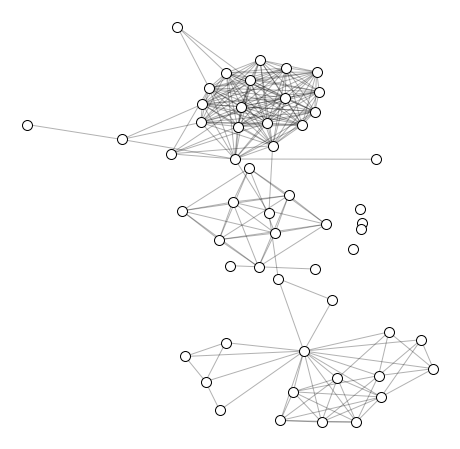

In [76]:
plt.figure(figsize=(8, 8))
frac_pos = nx.kamada_kawai_layout(ego)
nx.draw_networkx_nodes(ego, frac_pos, node_color='white', 
                       edgecolors='black', node_size=100)
nx.draw_networkx_edges(ego, frac_pos, alpha=0.3)
plt.axis('off')
plt.show()

In [74]:
coms = algorithms.louvain(ego)

In [80]:
nx.draw_networkx(coms)

TypeError: 'NodeClustering' object is not iterable

In [79]:
coms.to_node_community_map()

defaultdict(list,
            {14267065: [0],
             17783300: [0],
             20407589: [0],
             22705841: [0],
             23411741: [0],
             24451660: [0],
             29310069: [0],
             36759778: [0],
             39339022: [0],
             44153778: [0],
             60067050: [0],
             65885865: [0],
             68996993: [0],
             72092309: [0],
             82635559: [0],
             114671676: [0],
             119866171: [0],
             144776014: [0],
             163595722: [0],
             41448673: [0],
             12044433: [1],
             16812199: [1],
             26946950: [1],
             51918619: [1],
             65009219: [1],
             76458297: [1],
             84274403: [1],
             100765398: [1],
             137914356: [1],
             154310998: [1],
             156800764: [1],
             182638716: [1],
             221352958: [1],
             226419440: [1],
             377626